In [1]:
import numpy as np
from IPython.core.display import display
import matplotlib.pyplot as plt
from we_recommend_a_grade_10.data import *

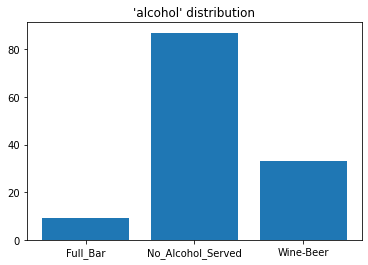

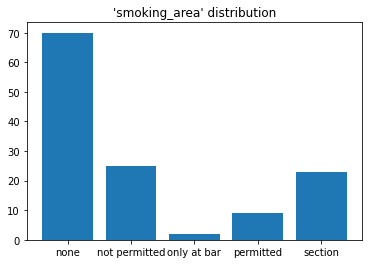

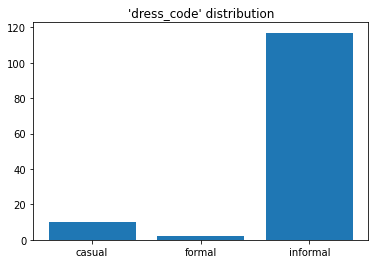

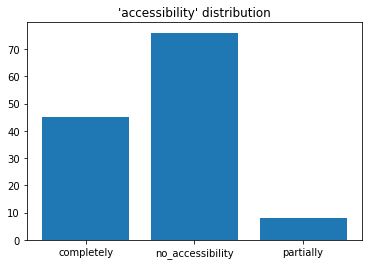

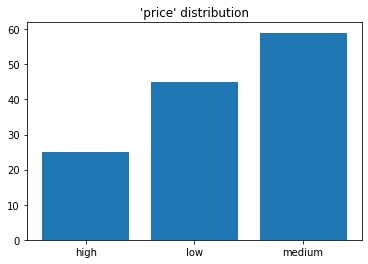

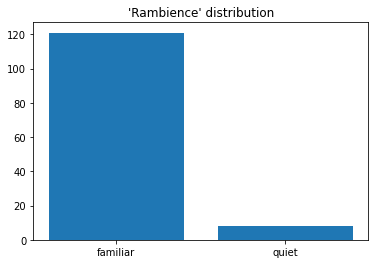

In [2]:
res_Profile.columns
vector_cols = ['alcohol', 'smoking_area', 'dress_code', 'accessibility', 'price', 'Rambience']
cp = res_Profile[vector_cols].copy()
for col in vector_cols:
    cpi = cp[col].sort_values().copy()
    cpi.index = range(len(cpi))
    cp[col] = cpi

cp_nd = cp.drop_duplicates().copy()
rng = list(cp_nd.index) + [len(cp)-1]
cp_nd['count'] = [rng[i+1] - rng[i] for i in range(len(cp_nd))]
cp_nd
for col in vector_cols:
    data = cp_nd.groupby(col)['count'].sum()
    plt.bar(data.index, data)
    plt.title("'%s' distribution"%col)
    plt.savefig('../graphs/%s_distribution.png'%col)
    plt.show()

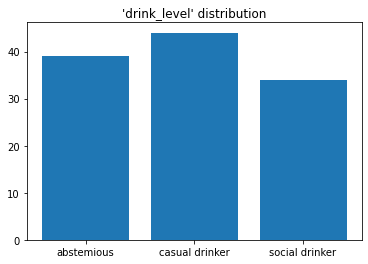

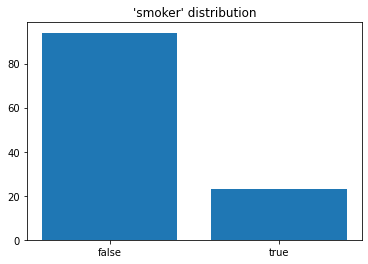

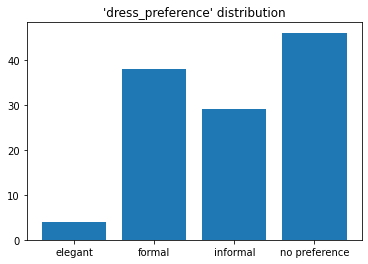

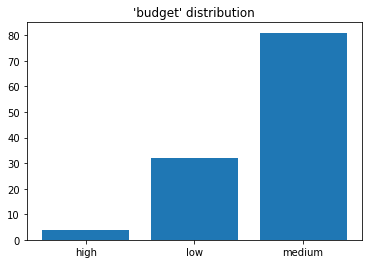

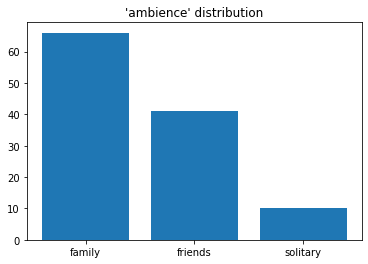

In [3]:
user_Profile_dropped = user_Profile.replace('?', np.NAN).dropna()
user_Profile_dropped.columns
vector_cols_user = ['drink_level', 'smoker', 'dress_preference', 'budget', 'ambience']
#'drink_level', 'smoker', 'dress_preference', None, 'budget', 'ambience'
cp_user = user_Profile_dropped[vector_cols_user].copy()
for col in vector_cols_user:
    cp_user_i = cp_user[col].sort_values().copy()
    cp_user_i.index = range(len(cp_user_i))
    cp_user[col] = cp_user_i

cp_nd_user = cp_user.drop_duplicates().copy()
rng_user = list(cp_nd_user.index) + [len(cp_user)-1]
cp_nd_user['count'] = [rng_user[i+1] - rng_user[i] for i in range(len(cp_nd_user))]
cp_nd_user
for col in vector_cols_user:
    data = cp_nd_user.groupby(col)['count'].sum()
    plt.bar(data.index, data)
    plt.title("'%s' distribution"%col)
    plt.savefig('../graphs/%s_distribution_user.png'%col)
    plt.show()

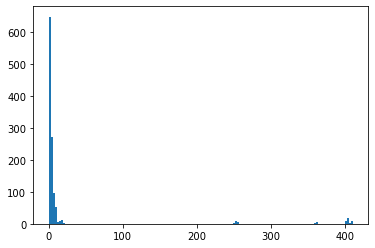

In [4]:
plt.hist(distance_matrix['distance'], 150)
plt.savefig('../graphs/distance_hist.png')

In [5]:
distance_matrix[distance_matrix['distance'] < 100]

,userID,placeID,distance
0,U1077,135085,0.693407
1,U1077,135038,0.806876
2,U1077,132825,1.036330
3,U1077,135060,0.729154
4,U1068,135104,0.080878
...,...,...,...
1156,U1043,132630,2.022179
1157,U1011,132715,1.015471
1158,U1068,132733,0.617608
1159,U1068,132594,0.295448


In [6]:
distance_matrix

,userID,placeID,distance
0,U1077,135085,0.693407
1,U1077,135038,0.806876
2,U1077,132825,1.036330
3,U1077,135060,0.729154
4,U1068,135104,0.080878
...,...,...,...
1156,U1043,132630,2.022179
1157,U1011,132715,1.015471
1158,U1068,132733,0.617608
1159,U1068,132594,0.295448


In [12]:
import we_recommend_a_grade_10.methods as mthds

tr, ts = mthds.get_train_test_split(simple_Ratings[simple_Ratings.rating > 0])
display(tr)
display(ts)
display(len(tr) + len(ts))


,user,item,rating
692,U1001,135033,3.0
691,U1001,135045,3.0
689,U1001,135040,3.0
694,U1001,135051,4.0
693,U1001,135025,6.0
...,...,...,...
888,U1137,135062,6.0
891,U1137,132755,6.0
886,U1137,135058,4.0
883,U1137,132834,6.0


,user,item,rating
215,U1001,132830,3.0
216,U1001,132825,5.0
688,U1001,135085,2.0
1062,U1002,135062,4.0
1068,U1002,135059,4.0
...,...,...,...
882,U1137,135085,5.0
890,U1137,132723,6.0
892,U1137,135042,6.0
893,U1137,132884,6.0


751